# Classifying newswires

- Multiclass Classification

building a network to classify Reuters newswires into 46 mutually exclusive topics

data - Reuters dataset

In [1]:
#importing and loading dataset
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 1000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 6s 3us/step


In [2]:
len(train_data), len(test_data)

(8982, 2246)

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2,
 2,
 14,
 46,
 2,
 2,
 86,
 61,
 2,
 2,
 14,
 61,
 451,
 2,
 17,
 12]

In [6]:
#decoding data
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

557056/550378 [==============================] - 2s 3us/step


In [9]:
decoded_review

'? ? ? said as a result of its december acquisition of ? co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? ? revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash ? per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
train_labels[10]

3

In [11]:
#encoding data
import numpy as np
#function to vectorize sequence
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [12]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [13]:
#encoding labels
from keras.utils.np_utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [14]:
from keras import layers,models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
#creating validation set
x_val=x_train[:1000]
x_train2 = x_train[1000:]
y_val=train_labels[:1000]
y_train2=train_labels[1000:]

In [21]:
#training
his = model.fit(x_train2,
               y_train2,
               epochs=20,
               batch_size=512,
               validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 272us/step - loss: 0.4221 - accuracy: 0.8716 - val_loss: 0.1788 - val_accuracy: 0.9783
Epoch 2/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.1278 - accuracy: 0.9784 - val_loss: 0.0954 - val_accuracy: 0.9817
Epoch 3/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.0826 - accuracy: 0.9845 - val_loss: 0.0711 - val_accuracy: 0.9871
Epoch 4/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.0633 - accuracy: 0.9870 - val_loss: 0.0561 - val_accuracy: 0.9879
Epoch 5/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.0522 - accuracy: 0.9880 - val_loss: 0.0487 - val_accuracy: 0.9883
Epoch 6/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.0456 - accuracy: 0.9888 - val_loss: 0.0436 - val_accuracy: 0.9891
Epoch 7/20
7982/7982 [==============================] - 1s 149us/step - loss

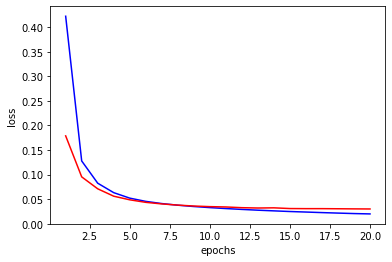

In [22]:
#plotting losses
import matplotlib.pyplot as plt
his_dict = his.history
loss_values = his_dict['loss']
val_loss = his_dict['val_loss']
epochs = range(1, 21)
plt.plot(epochs,loss_values,'b')
plt.plot(epochs,val_loss,'r')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

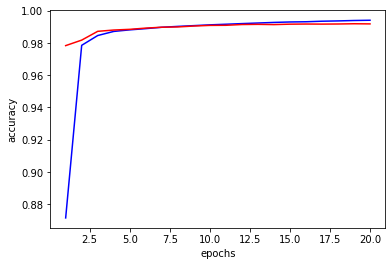

In [23]:
#plotting accuracy
acc_values = his_dict['accuracy']
val_acc_loss = his_dict['val_accuracy']
epochs = range(1, 21)
plt.plot(epochs,acc_values,'b')
plt.plot(epochs,val_acc_loss,'r')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [24]:
results = model.evaluate(x_test, test_labels)

2246/2246 [==============================] - 1s 315us/step


In [25]:
results

[0.03204220323719728, 0.9909888505935669]

Accuracy : 99%
loss : 0.032

In [26]:
predictions = model.predict(x_test)

In [27]:
predictions

array([[1.15953271e-05, 2.50434205e-05, 6.93080256e-06, ...,
        5.97649159e-06, 5.08814082e-06, 1.32691594e-06],
       [4.39760694e-03, 1.63739920e-02, 1.24528073e-02, ...,
        3.68598441e-04, 1.11562095e-03, 1.23997778e-03],
       [4.49931528e-03, 8.37391078e-01, 7.00570047e-02, ...,
        4.44254729e-05, 4.80482006e-04, 1.05364155e-03],
       ...,
       [5.05439857e-06, 6.70479902e-04, 2.93146091e-04, ...,
        9.46227301e-05, 2.81016255e-04, 1.85623849e-05],
       [1.17724616e-04, 3.46522755e-03, 9.71070840e-04, ...,
        4.94507440e-05, 8.40428256e-05, 1.19485274e-04],
       [3.44706117e-04, 1.88012719e-01, 1.68916322e-02, ...,
        1.87782920e-04, 2.33273651e-03, 3.77866410e-04]], dtype=float32)

In [28]:
predictions[0].shape

(46,)

In [29]:
np.argmax(predictions[0])

3